# Conditional Probability

### P (E, F) = P(E) P(F)   ---   Independent
### P(E|F) = P(E,F) / P(F)  ---  Dependent

One common tricky example involves a family with two (unknown) children.
If we assume that:
1. Each child is equally likely to be a boy or a girl
2. The gender of the second child is independent of the gender of the first child 

Then the event “no girls” has probability 1/4, the event “one girl, one boy” has probability 1/2, and the event “two girls” has probability 1/4.

what is the probability of the event “both children are girls” (B) con‐
ditional on the event “the older child is a girl” (G)? Using the definition of conditional
probability:
**P(B|G) = P (B, G) /P(G) = P(B)/P(G) = 1/2**

We could also ask about the probability of the event “both children are girls” condi‐
tional on the event “at least one of the children is a girl” (L). Surprisingly, the answer
is different from before!
**P(B|L) = P(B, L) /P(L) = P(B)/P(L) = 1/3**

In [7]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
print("P(both | older):", both_girls / older_girl)
print("P(both | either): ", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


# Continuous Distributions

In [8]:
# probability density function(pdf)
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    if x < 0:   return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g p(X <= 0.4) = 0.4
    else:       return 1 # uniform random is always less than 1

# The Normal Distribution

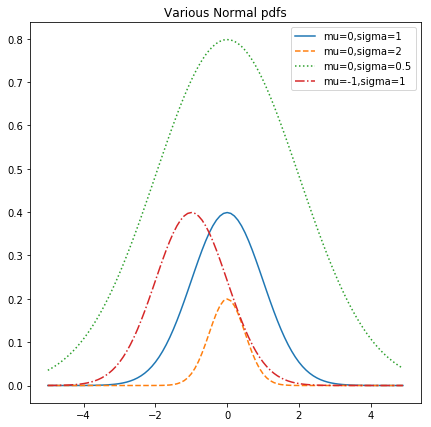

In [15]:
import math
import matplotlib.pyplot as plt

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x - mu) ** 2 / 2 * sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize=(7,7))
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

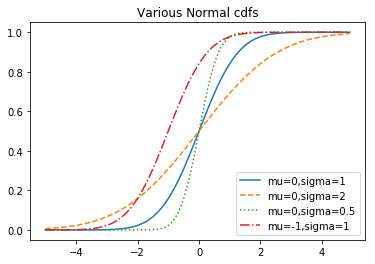

In [16]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [17]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

# The Central Limit Theorem

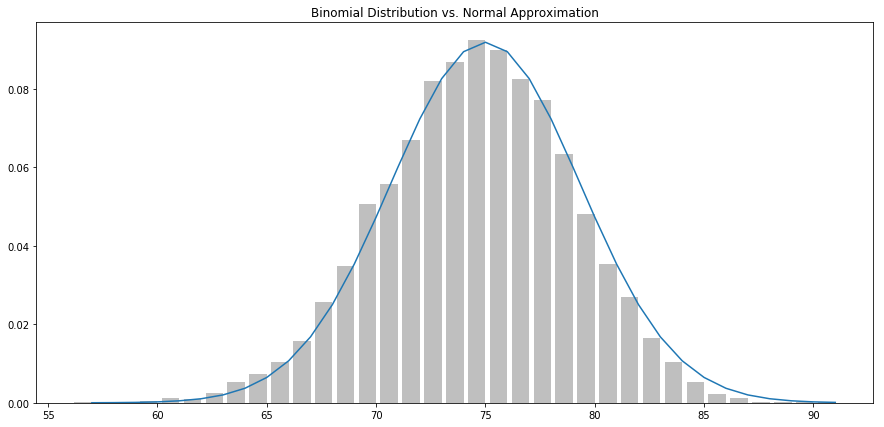

In [24]:
from collections import Counter


def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.figure(figsize=(15, 7))
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
make_hist(0.75, 100, 10000)